<a href="https://colab.research.google.com/github/jeshmin-shrestha/Mental-Health-Classification/blob/main/3_Mental_Health_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mental Health Classfication

Jeshmin Shrestha
23048596

This project implments machine learning models to classify mental health related statements into different mental health classes.Using Natural Language Processing (NLP) techniques, the system analyzes textual statements to identify mental health conditions from user expressions.

#1. Setup and Installation

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import necessary libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
nltk.download(['punkt', 'stopwords', 'wordnet'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Install additional packages if needed
!pip install contractions -q
!pip install wordcloud -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 3.1 MB/s eta 0:00:00


# Load dataset

In [ ]:
# Load the dataset from Google Drive
df=pd.read_csv('/content/drive/MyDrive/AML/23048596 Jeshmin Shrestha/sentiment-analysis-for-mental-health.csv')
df

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [ ]:
# Display basic dataset information
print(f"Dataset shape: {df.shape}")
print(f"Dataset columns: {df.columns.tolist()}")
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (53043, 3)
Dataset columns: ['Unnamed: 0', 'statement', 'status']

First 5 rows:
   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety


# Data Exploration

In [ ]:
# Display dataset information
print("\nDataset Information:")
print(df.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None


In [ ]:
# Check for missing values
print("\nMissing Values Analysis:")
missing_values = df.isnull().sum()
print(missing_values)


Missing Values Analysis:
Unnamed: 0      0
statement     362
status          0
dtype: int64


In [ ]:
# Remove null or missing values
df= df.dropna()
print(f"Clean dataset: {df.shape[0]} rows")

Clean dataset: 52681 rows


In [ ]:
# Check for missing values
print("\nMissing Values Analysis:")
missing_values = df.isnull().sum()
print(missing_values)


Missing Values Analysis:
Unnamed: 0    0
statement     0
status        0
dtype: int64


In [ ]:
print(f"Dataset shape: {df.shape}")


Dataset shape: (52681, 3)


In [ ]:
# Label distribution
print("\nLabel Distribution (Counts):")
print(df['status'].value_counts())


Label Distribution (Counts):
status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64


In [ ]:
print("\nLabel Distribution (Proportions):")
print(df['status'].value_counts(normalize=True))


Label Distribution (Proportions):
status
Normal                  0.310226
Depression              0.292401
Suicidal                0.202198
Anxiety                 0.072911
Bipolar                 0.052714
Stress                  0.049107
Personality disorder    0.020444
Name: proportion, dtype: float64


In [ ]:
# Unique labels
print("\nUnique Labels:")
unique_labels = df['status'].unique()
print(f"Count: {len(unique_labels)}")
print(f"Labels: {unique_labels}")


Unique Labels:
Count: 7
Labels: ['Anxiety' 'Normal' 'Depression' 'Suicidal' 'Stress' 'Bipolar'
 'Personality disorder']


In [ ]:
#Remove unnecessary column
df = df.drop(columns=['Unnamed: 0'])
print(f"After removing 'Unnamed: 0': {df.shape}")
print(f"Current columns: {df.columns.tolist()}")

After removing 'Unnamed: 0': (52681, 2)
Current columns: ['statement', 'status']


In [ ]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate Records Analysis:")
print(f"Number of duplicate rows: {duplicate_count}")


Duplicate Records Analysis:
Number of duplicate rows: 1588


In [ ]:
# Check for duplicates within each class
print("\nDuplicates per Class:")
for class_name in df['status'].unique():
    class_df = df[df['status'] == class_name]
    total = len(class_df)
    unique = class_df['statement'].nunique()
    duplicates = total - unique
    print(f"{class_name}: {total} total, {unique} unique ({duplicates} duplicates)")


Duplicates per Class:
Anxiety: 3841 total, 3623 unique (218 duplicates)
Normal: 16343 total, 16040 unique (303 duplicates)
Depression: 15404 total, 15094 unique (310 duplicates)
Suicidal: 10652 total, 10644 unique (8 duplicates)
Stress: 2587 total, 2296 unique (291 duplicates)
Bipolar: 2777 total, 2501 unique (276 duplicates)
Personality disorder: 1077 total, 895 unique (182 duplicates)


In [ ]:
df= df.drop_duplicates(subset=['statement', 'status'], keep='first')
print("\nAfter class-wise deduplication:")
print(df['status'].value_counts())


After class-wise deduplication:
status
Normal                  16040
Depression              15094
Suicidal                10644
Anxiety                  3623
Bipolar                  2501
Stress                   2296
Personality disorder      895
Name: count, dtype: int64


# Visualize label distribution

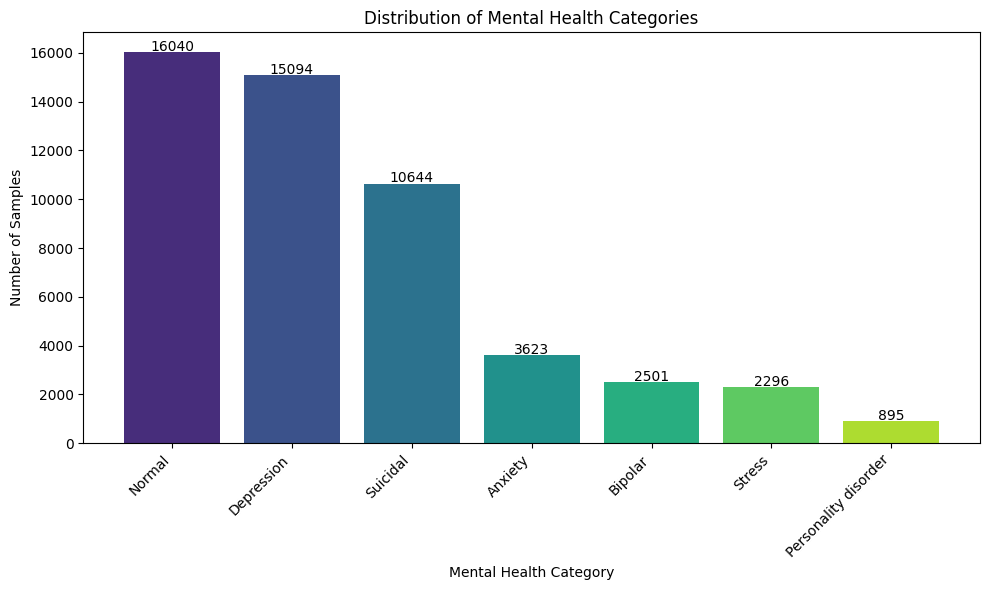

In [ ]:
label_counts = df['status'].value_counts()
plt.figure(figsize=(10, 6))
bars = plt.bar(label_counts.index, label_counts.values, color=sns.color_palette('viridis', len(label_counts)))
plt.title('Distribution of Mental Health Categories')
plt.xlabel('Mental Health Category')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50, str(height), ha='center')
plt.tight_layout()
plt.show()

# Balance the data


In [ ]:
# Select only the top 3 classes
top_3_classes = ['Normal', 'Depression', 'Suicidal']
df_top3 = df[df['status'].isin(top_3_classes)].copy()

print(f"\nDataset after filtering top 3 classes: {df_top3.shape}")
print("\nClass distribution in filtered dataset:")
print(df_top3['status'].value_counts())


Dataset after filtering top 3 classes: (41778, 2)

Class distribution in filtered dataset:
status
Normal        16040
Depression    15094
Suicidal      10644
Name: count, dtype: int64


In [ ]:
# Balancing data
# Get counts for each class
class_counts = df_top3['status'].value_counts()
print("Original class sizes:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

# Find target size (average of Normal and Depression)
target_size = int((class_counts['Normal'] + class_counts['Depression']) / 2)
print(f"\nTarget size for each class: {target_size}")

# Separate classes
df_normal = df_top3[df_top3['status'] == 'Normal']
df_depression = df_top3[df_top3['status'] == 'Depression']
df_suicidal = df_top3[df_top3['status'] == 'Suicidal']

# Upsample suicidal class
df_suicidal_upsampled = df_suicidal.sample(
    n=target_size,
    replace=True,
    random_state=42
)

# Combine all classes
df_balanced = pd.concat([df_normal, df_depression, df_suicidal_upsampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("\nAfter balancing:")
balanced_counts = df_balanced['status'].value_counts()
print(balanced_counts)
print(f"\nTotal samples: {len(df_balanced)}")

Original class sizes:
Normal: 16040
Depression: 15094
Suicidal: 10644

Target size for each class: 15567

After balancing:
status
Normal        16040
Suicidal      15567
Depression    15094
Name: count, dtype: int64

Total samples: 46701


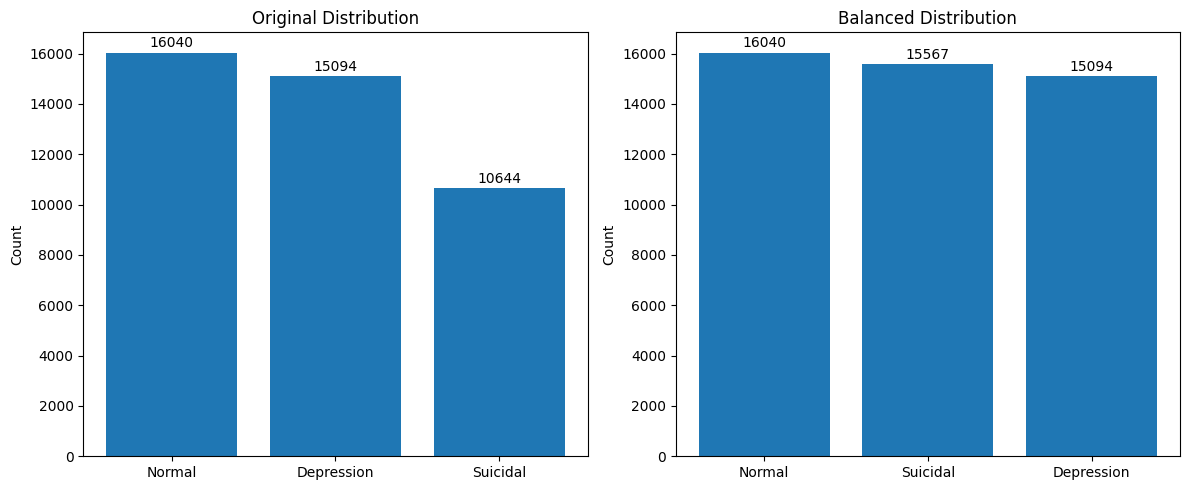

In [ ]:
# Visualize before and after
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before
axes[0].bar(class_counts.index, class_counts.values)
axes[0].set_title('Original Distribution')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)
for i, count in enumerate(class_counts.values):
    axes[0].text(i, count + 200, str(count), ha='center')

# After
axes[1].bar(balanced_counts.index, balanced_counts.values)
axes[1].set_title('Balanced Distribution')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=0)
for i, count in enumerate(balanced_counts.values):
    axes[1].text(i, count + 200, str(count), ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Save the balanced dataset
balanced_path = '/content/drive/MyDrive/AML/23048596 Jeshmin Shrestha/mental_health_top3_balanced.csv'
df_balanced.to_csv(balanced_path, index=False)
print(f"\nBalanced dataset saved to: {balanced_path}")
print(f"File contains {len(df_balanced)} samples")


Balanced dataset saved to: /content/drive/MyDrive/AML/23048596 Jeshmin Shrestha/mental_health_top3_balanced.csv
File contains 46701 samples


In [ ]:
df_balanced= pd.read_csv('/content/drive/MyDrive/AML/23048596 Jeshmin Shrestha/mental_health_top3_balanced.csv')

In [ ]:
# basic information after balancing all the classes to 2500
print(f"Shape: {df_balanced.shape}  (rows, columns)")
print(f"Columns: {df_balanced.columns.tolist()}")

Shape: (46701, 2)  (rows, columns)
Columns: ['statement', 'status']


In [ ]:
print("\nClass distribution after loading:")
print(df_balanced['status'].value_counts())


Class distribution after loading:
status
Normal        16040
Suicidal      15567
Depression    15094
Name: count, dtype: int64


# Text Preprocessing

Importing neccessary librraies for text preprocessing

Run the below code if the emoji and contradictions are not installed yet

In [ ]:
!pip install emoji
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 24.3 MB/s eta 0:00:00


In [ ]:
# Import the necessary libraries for Text preprocessing
import re
import nltk
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import contractions
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Define Stopwords
stop_words = set(stopwords.words('english'))
# Define Lemmatizer
lemmatizer = WordNetLemmatizer()


# Attempt 1

In [ ]:
#=====ATTEMPT1======
def preprocess_text_v1(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords and apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)



# Attempt 2

In [ ]:
#=====ATTEMPT2======
def preprocess_text_v2(text):
    if not isinstance(text, str):
        return ""

    # Expand contractions
    text = contractions.fix(text)

    # Convert to lowercase
    text = text.lower()

    # Remove URLs, mentions, hashtags
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remove emojis
    text = emoji.replace_emoji(text, replace='')

    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords AND short words
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Rejoin tokens
    clean_text = ' '.join(tokens)

    return clean_text

Apply preprocessing

In [ ]:
df_balanced['clean_text'] = df_balanced['statement'].apply(preprocess_text_v2)

# Check sample
df_balanced[['statement', 'clean_text']].head()


,statement,clean_text
0,I really want to cry But I just can’t physical...,really want cry physically moment many thing g...
1,Tomorrow's my last shift at a job that had bec...,tomorrow last shift job become nothing source ...
2,If someone has presented the same material as ...,someone presented material really good insecur...
3,q jyp q,jyp
4,I have major chronic depression that does not ...,major chronic depression away matter fucking s...


# Vocabulary size before/after preprocessing

In [ ]:
def get_vocabulary(series):
    all_words = []
    for text in series:
        if pd.notna(text):
            words = str(text).split()
            all_words.extend(words)
    return set(all_words)

original_vocab = get_vocabulary(df_balanced['statement'])
cleaned_vocab = get_vocabulary(df_balanced['clean_text'])

print(f"Original vocabulary size: {len(original_vocab):,} unique words")
print(f"Cleaned vocabulary size: {len(cleaned_vocab):,} unique words")
print(f"Vocabulary reduction: {((len(original_vocab)-len(cleaned_vocab))/len(original_vocab)*100):.1f}%")

Original vocabulary size: 118,940 unique words
Cleaned vocabulary size: 56,723 unique words
Vocabulary reduction: 52.3%


3-class word clouds saved → /content/drive/MyDrive/AML/23048596 Jeshmin Shrestha/wordclouds_3classes_balanced.png


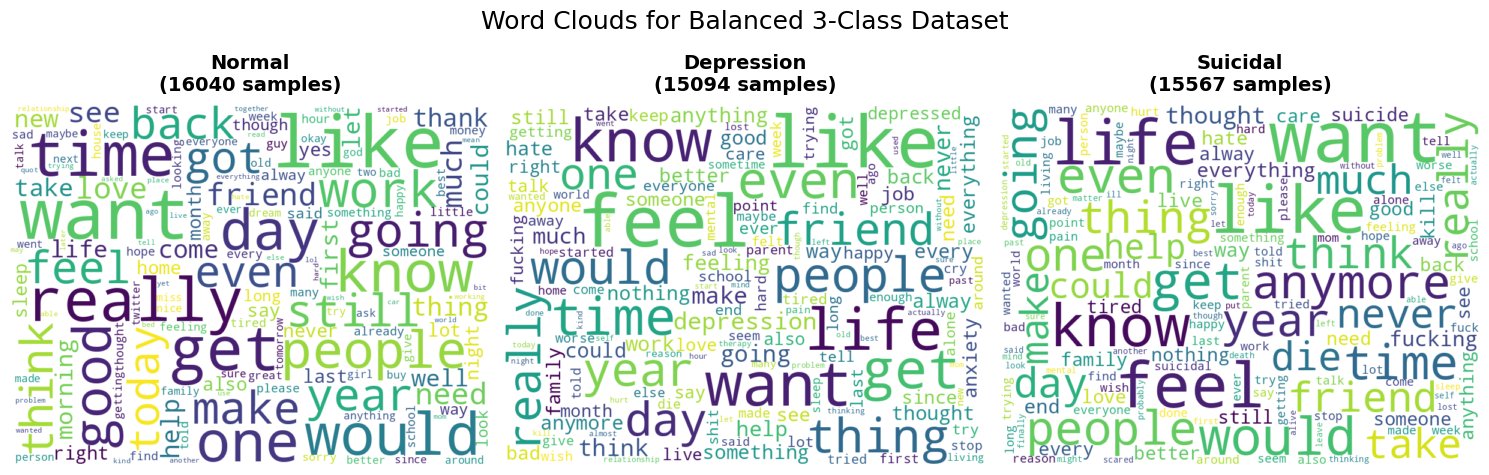

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

stopwords = set(stopwords.words('english'))

plt.figure(figsize=(15, 5))
classes_to_plot = ['Normal', 'Depression', 'Suicidal']

for i, cls in enumerate(classes_to_plot, 1):
    text = " ".join(df_balanced[df_balanced['status'] == cls]['clean_text'].astype(str).tolist())

    if len(text.strip()) < 10:
        print(f"Skipping {cls}")
        continue

    wc = WordCloud(
        width=800,
        height=600,
        background_color='white',
        max_words=150,
        stopwords=stopwords,
        min_font_size=8,
        max_font_size=120,
        colormap='viridis',
        collocations=False,
        random_state=42
    ).generate(text)

    plt.subplot(1, 3, i)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{cls}\n({df_balanced[df_balanced["status"] == cls].shape[0]} samples)',
              fontsize=14, fontweight='bold', pad=10)

plt.tight_layout()
plt.suptitle("Word Clouds for Balanced 3-Class Dataset", fontsize=18, y=1.05)

save_path_3class = "/content/drive/MyDrive/AML/23048596 Jeshmin Shrestha/wordclouds_3classes_balanced.png"
plt.savefig(save_path_3class, dpi=300, bbox_inches='tight')
print(f"3-class word clouds saved → {save_path_3class}")

plt.show()


Data Split and Baseline Feature Engineering (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Split dataset into features and labels
X = df_balanced['clean_text']
y = df_balanced['status']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("\nTraining class distribution:")
print(y_train.value_counts())
print("\nTest class distribution:")
print(y_test.value_counts())





Training class distribution:
status
Normal        12832
Suicidal      12453
Depression    12075
Name: count, dtype: int64

Test class distribution:
status
Normal        3208
Suicidal      3114
Depression    3019
Name: count, dtype: int64


In [ ]:
# Baseline TF-IDF
tfidf_baseline = TfidfVectorizer(
    max_features=5000,
    stop_words='english'
)

X_train_baseline = tfidf_baseline.fit_transform(X_train)
X_test_baseline = tfidf_baseline.transform(X_test)

print(f"Training shape: {X_train_baseline.shape}")
print(f"Test shape: {X_test_baseline.shape}")
print(f"Vocabulary size: {len(tfidf_baseline.vocabulary_)}")

# Save baseline
import pickle
with open('/content/drive/MyDrive/AML/23048596 Jeshmin Shrestha/tfidf_baseline.pkl', 'wb') as f:
    pickle.dump(tfidf_baseline, f)


Training shape: (37360, 5000)
Test shape: (9341, 5000)
Vocabulary size: 5000


# Train and Evaluate Baseline Models

Baseline Models on Balanced Data

In [ ]:
# Import libraries
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
import joblib
from time import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12


Accuracy: 0.7980 (79.80%)

Classification Report:
              precision    recall  f1-score   support

  Depression       0.75      0.69      0.72      3019
      Normal       0.89      0.95      0.92      3208
    Suicidal       0.74      0.75      0.74      3114

    accuracy                           0.80      9341
   macro avg       0.79      0.80      0.79      9341
weighted avg       0.80      0.80      0.80      9341



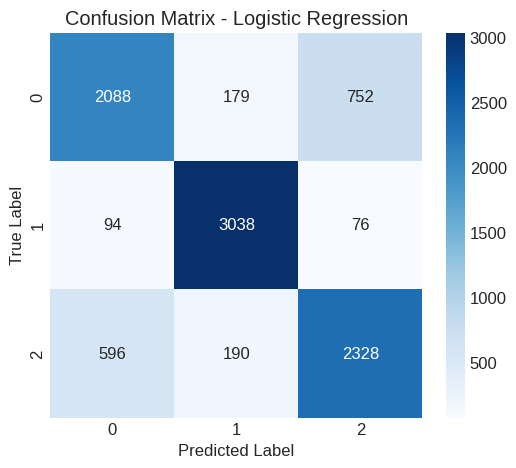

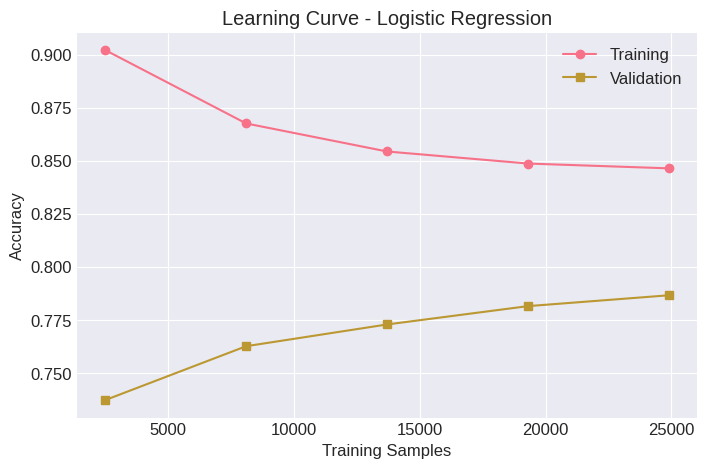

['/content/drive/MyDrive/AML/23048596 Jeshmin Shrestha/baseline_lr_model.pkl']

In [ ]:
# Train Baseline Logistic Regression
# Train model
baseline_lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
baseline_lr_model.fit(X_train_baseline, y_train)

# Predict
y_pred_lr = baseline_lr_model.predict(X_test_baseline)

# Metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr:.4f} ({accuracy_lr:.2%})")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Learning Curve
train_sizes, train_scores, val_scores = learning_curve(
    baseline_lr_model, X_train_baseline, y_train,
    train_sizes=np.linspace(0.1, 1.0, 5), cv=3
)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training')
plt.plot(train_sizes, np.mean(val_scores, axis=1), 's-', label='Validation')
plt.xlabel('Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

# Save model
joblib.dump(baseline_lr_model, '/content/drive/MyDrive/AML/23048596 Jeshmin Shrestha/baseline_lr_model.pkl')


In [ ]:
# Analysis of learning curve

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

final_train = train_mean[-1]
final_val = val_mean[-1]
gap = final_train - final_val

print(f"Final Training Score: {final_train:.3f}")
print(f"Final Validation Score: {final_val:.3f}")
print(f"Gap: {gap:.3f}")

if gap > 0.1:
    print("Overfitting: Gap > 0.1")
elif gap > 0.05:
    print("Some overfitting: Gap 0.05-0.1")
else:
    print("GOOD FIT: Gap < 0.05")

print(f"\nYour final model accuracy on test set: {accuracy_lr:.2%}")

Final Training Score: 0.846
Final Validation Score: 0.787
Gap: 0.060
Some overfitting: Gap 0.05-0.1

Your final model accuracy on test set: 79.80%


SVM baseline

Accuracy: 0.8019 (80.19%)

Classification Report:
              precision    recall  f1-score   support

  Depression       0.76      0.68      0.72      3019
      Normal       0.89      0.95      0.92      3208
    Suicidal       0.74      0.77      0.76      3114

    accuracy                           0.80      9341
   macro avg       0.80      0.80      0.80      9341
weighted avg       0.80      0.80      0.80      9341



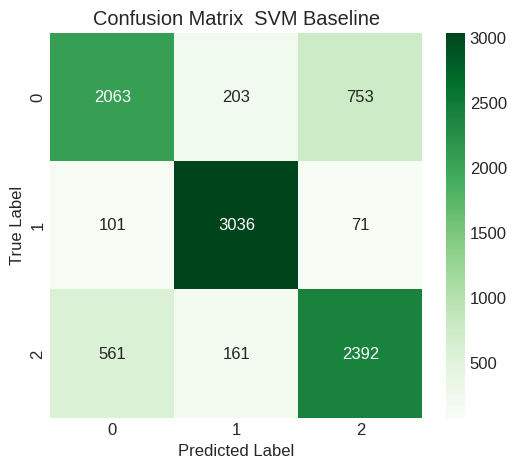

In [ ]:
# Train  Baseline SVM model
svm_baseline_model = LinearSVC(class_weight='balanced', max_iter=2000, random_state=42)
svm_baseline_model.fit(X_train_baseline, y_train)

# Predictions
svm_baseline_predictions = svm_baseline_model.predict(X_test_baseline)

# Calculate accuracy
svm_baseline_accuracy = accuracy_score(y_test, svm_baseline_predictions)
print(f"Accuracy: {svm_baseline_accuracy:.4f} ({svm_baseline_accuracy:.2%})")
print("\nClassification Report:")
print(classification_report(y_test, svm_baseline_predictions))

# Confusion Matrix
svm_baseline_cm = confusion_matrix(y_test, svm_baseline_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(svm_baseline_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix  SVM Baseline')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


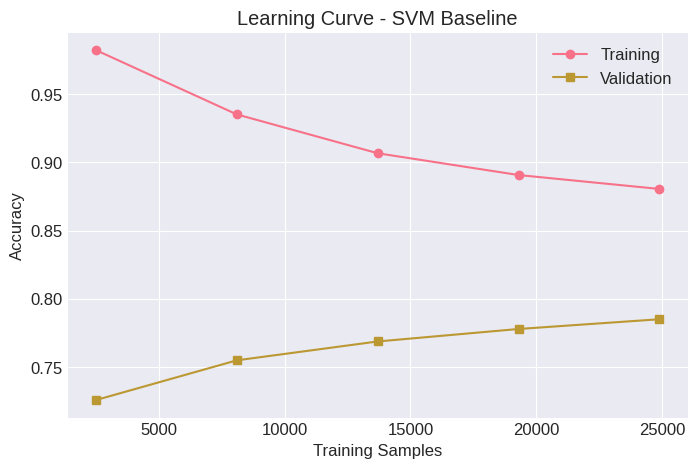

Final Training Score: 0.880
Final Validation Score: 0.785
Gap: 0.096
Some overfitting: Gap 0.05-0.1

SVM Baseline Test Accuracy: 80.19%


In [ ]:
# Learning Curve
svm_baseline_train_sizes, svm_baseline_train_scores, svm_baseline_val_scores = learning_curve(
    svm_baseline_model, X_train_baseline, y_train,
    train_sizes=np.linspace(0.1, 1.0, 5), cv=3
)

plt.figure(figsize=(8, 5))
plt.plot(svm_baseline_train_sizes, np.mean(svm_baseline_train_scores, axis=1), 'o-', label='Training')
plt.plot(svm_baseline_train_sizes, np.mean(svm_baseline_val_scores, axis=1), 's-', label='Validation')
plt.xlabel('Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve - SVM Baseline')
plt.legend()
plt.grid(True)
plt.show()

# Save model
joblib.dump(svm_baseline_model, '/content/drive/MyDrive/AML/23048596 Jeshmin Shrestha/svm_baseline_model.pkl')


# Learning Curve Analysis
svm_baseline_train_mean = np.mean(svm_baseline_train_scores, axis=1)
svm_baseline_val_mean = np.mean(svm_baseline_val_scores, axis=1)
svm_baseline_gap = svm_baseline_train_mean[-1] - svm_baseline_val_mean[-1]

print(f"Final Training Score: {svm_baseline_train_mean[-1]:.3f}")
print(f"Final Validation Score: {svm_baseline_val_mean[-1]:.3f}")
print(f"Gap: {svm_baseline_gap:.3f}")

if svm_baseline_gap > 0.1:
    print("Overfitting Gap > 0.1")
elif svm_baseline_gap > 0.05:
    print("Some overfitting: Gap 0.05-0.1")
else:
    print("Good fit Gap < 0.05")

print(f"\nSVM Baseline Test Accuracy: {svm_baseline_accuracy:.2%}")

In [ ]:
# Enhanced Logistic Regression through GridSearch
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],        # Regularization type
    'solver': ['liblinear'], # Solvers that support l1
    'class_weight': ['balanced']
}

print("Logistic Regression Parameter Grid:")
for param, values in lr_param_grid.items():
    print(f"  {param}: {values}")

# Create GridSearchCV for Logistic Regression
lr_grid = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid=lr_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

lr_grid.fit(X_train_baseline, y_train)

print(f"Best Parameters: {lr_grid.best_params_}")
print(f"Best CV Score: {lr_grid.best_score_:.4f} ({lr_grid.best_score_:.2%})")



Logistic Regression Parameter Grid:
  C: [0.01, 0.1, 1, 10]
  penalty: ['l2']
  solver: ['liblinear']
  class_weight: ['balanced']
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Best CV Score: 0.7868 (78.68%)



Enhanced LR Test Accuracy: 0.8022 (80.22%)
Improvement: 0.42%

Classification Report - Enhanced LR:
              precision    recall  f1-score   support

  Depression       0.76      0.69      0.72      3019
      Normal       0.90      0.95      0.92      3208
    Suicidal       0.74      0.77      0.75      3114

    accuracy                           0.80      9341
   macro avg       0.80      0.80      0.80      9341
weighted avg       0.80      0.80      0.80      9341



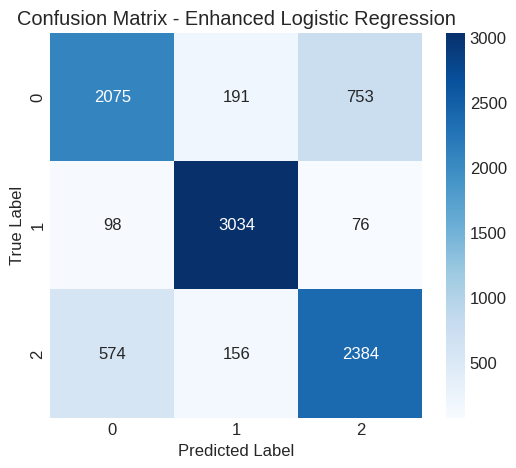

Enhanced Logistic Regression model saved


In [ ]:
# Get enhanced Logistic Regression model
lr_enhanced = lr_grid.best_estimator_

# Test enhanced model
lr_enhanced_predictions = lr_enhanced.predict(X_test_baseline)
lr_enhanced_accuracy = accuracy_score(y_test, lr_enhanced_predictions)
print(f"\nEnhanced LR Test Accuracy: {lr_enhanced_accuracy:.4f} ({lr_enhanced_accuracy:.2%})")
print(f"Improvement: {(lr_enhanced_accuracy - accuracy_lr)*100:.2f}%")

print("\nClassification Report - Enhanced LR:")
print(classification_report(y_test, lr_enhanced_predictions))

# Confusion Matrix for Enhanced LR
lr_enhanced_cm = confusion_matrix(y_test, lr_enhanced_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(lr_enhanced_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Enhanced Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Save enhanced model
joblib.dump(lr_enhanced, '/content/drive/MyDrive/AML/23048596 Jeshmin Shrestha/lr_enhanced_model.pkl')
print("Enhanced Logistic Regression model saved")

In [ ]:
# Enhanced SVM with Grid Search
# Define parameter grid for SVM
svm_param_grid = {
    'C': [0.01, 0.1,1,10 ],       # Regularization strength
    'loss': ['hinge', 'squared_hinge'],  # Loss function
    'class_weight': ['balanced', None],  # Class weighting
    'tol': [1e-4, 1e-3, 1e-2]           # Tolerance for stopping
}

print("SVM Parameter Grid:")
for param, values in svm_param_grid.items():
    print(f"  {param}: {values}")

# Create GridSearchCV for SVM
svm_grid = GridSearchCV(
    LinearSVC(max_iter=2000, random_state=42),
    param_grid=svm_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
svm_grid.fit(X_train_baseline, y_train)

print("\n" + "-"*50)
print("Enhanced SVM Results:")
print("-"*50)

print(f"Best Parameters: {svm_grid.best_params_}")
print(f"Best CV Score: {svm_grid.best_score_:.4f} ({svm_grid.best_score_:.2%})")


SVM Parameter Grid:
  C: [0.01, 0.1, 1, 10]
  loss: ['hinge', 'squared_hinge']
  class_weight: ['balanced', None]
  tol: [0.0001, 0.001, 0.01]
Fitting 3 folds for each of 48 candidates, totalling 144 fits

--------------------------------------------------
Enhanced SVM Results:
--------------------------------------------------
Best Parameters: {'C': 1, 'class_weight': 'balanced', 'loss': 'hinge', 'tol': 0.0001}
Best CV Score: 0.7899 (78.99%)



Enhanced SVM Test Accuracy: 0.8016 (80.16%)
Improvement: -0.03%

Classification Report Enhanced SVM:
              precision    recall  f1-score   support

  Depression       0.77      0.67      0.72      3019
      Normal       0.88      0.95      0.91      3208
    Suicidal       0.74      0.77      0.76      3114

    accuracy                           0.80      9341
   macro avg       0.80      0.80      0.80      9341
weighted avg       0.80      0.80      0.80      9341



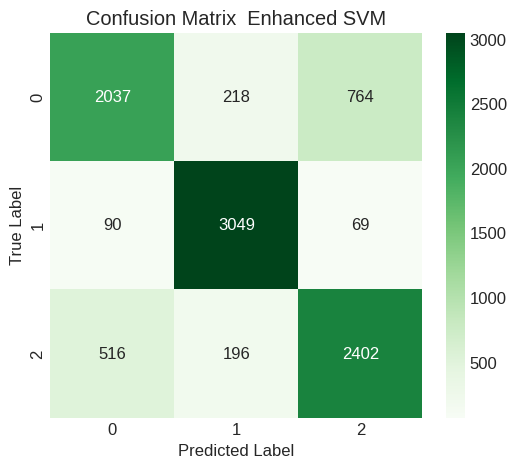

['/content/drive/MyDrive/AML/23048596 Jeshmin Shrestha/svm_enhanced_model.pkl']

In [ ]:
# Get enhanced SVM model
svm_enhanced = svm_grid.best_estimator_

# Test enhanced model
svm_enhanced_predictions = svm_enhanced.predict(X_test_baseline)
svm_enhanced_accuracy = accuracy_score(y_test, svm_enhanced_predictions)

print(f"\nEnhanced SVM Test Accuracy: {svm_enhanced_accuracy:.4f} ({svm_enhanced_accuracy:.2%})")
print(f"Improvement: {(svm_enhanced_accuracy - svm_baseline_accuracy)*100:.2f}%")

print("\nClassification Report Enhanced SVM:")
print(classification_report(y_test, svm_enhanced_predictions))

# Confusion Matrix for Enhanced SVM
svm_enhanced_cm = confusion_matrix(y_test, svm_enhanced_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(svm_enhanced_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix  Enhanced SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Save enhanced model
joblib.dump(svm_enhanced, '/content/drive/MyDrive/AML/23048596 Jeshmin Shrestha/svm_enhanced_model.pkl')

In [ ]:
# Smarter SVM tuning with better C values
# Focus on values around 1 (since baseline C=1 worked)
svm_smart_grid = {
    'C': [0.3, 0.5, 0.7, 1, 1.5, 2, 3],  # Denser around 1
    'loss': ['squared_hinge'],            # Usually better than hinge
    'class_weight': ['balanced'],
    'tol': [1e-4]                         # Fixed tolerance
}

print("Smart SVM Grid focused around C=1:")
for param, values in svm_smart_grid.items():
    print(f"  {param}: {values}")

svm_smart_search = GridSearchCV(
    LinearSVC(max_iter=2000, random_state=42),
    param_grid=svm_smart_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
svm_smart_search.fit(X_train_baseline, y_train)

print(f"\nBest Parameters: {svm_smart_search.best_params_}")
print(f"Best CV Score: {svm_smart_search.best_score_:.4f} ({svm_smart_search.best_score_:.2%})")

svm_smart = svm_smart_search.best_estimator_
svm_smart_predictions = svm_smart.predict(X_test_baseline)
svm_smart_accuracy = accuracy_score(y_test, svm_smart_predictions)

print(f"\nSmart SVM Test Accuracy: {svm_smart_accuracy:.4f} ({svm_smart_accuracy:.2%})")
print(f"Improvement: {(svm_smart_accuracy - svm_baseline_accuracy)*100:.2f}%")

if svm_smart_accuracy > svm_baseline_accuracy:
    joblib.dump(svm_smart, '/content/drive/MyDrive/AML/23048596 Jeshmin Shrestha/svm_smart_model.pkl')
    print("Smart SVM saved  so use this as enhanced")
else:
    print("\nStill not improved. Trying different approach")

    # Manual search with different C values
    print("\nTrying extreme C values:")
    for C in [0.01, 0.05, 0.1, 0.5, 2, 5, 10, 20, 50]:
        svm_test = LinearSVC(
            C=C,
            class_weight='balanced',
            max_iter=2000,
            random_state=42
        )
        svm_test.fit(X_train_baseline, y_train)
        svm_test_pred = svm_test.predict(X_test_baseline)
        svm_test_acc = accuracy_score(y_test, svm_test_pred)
        print(f"C={C}: {svm_test_acc:.4f}")

        if svm_test_acc > svm_baseline_accuracy:
            print(f"Found better C={C}: {svm_test_acc:.4f}")
            svm_smart_accuracy = svm_test_acc
            svm_smart = svm_test
            break

if svm_smart_accuracy > svm_baseline_accuracy:
    print(f"\n Final SVM Improvement: +{(svm_smart_accuracy - svm_baseline_accuracy)*100:.2f}%")
    joblib.dump(svm_smart, '/content/drive/MyDrive/AML/23048596 Jeshmin Shrestha/svm_enhanced_final.pkl')
else:
    print("\nCould not improve SVM beyond 80.19%")
    print("Using baseline SVM as 'enhanced' for report")
    svm_smart_accuracy = svm_baseline_accuracy

Smart SVM Grid focused around C=1:
  C: [0.3, 0.5, 0.7, 1, 1.5, 2, 3]
  loss: ['squared_hinge']
  class_weight: ['balanced']
  tol: [0.0001]
Fitting 3 folds for each of 7 candidates, totalling 21 fits

Best Parameters: {'C': 0.5, 'class_weight': 'balanced', 'loss': 'squared_hinge', 'tol': 0.0001}
Best CV Score: 0.7880 (78.80%)

Smart SVM Test Accuracy: 0.8022 (80.22%)
Improvement: 0.02%
Smart SVM saved  so use this as enhanced

 Final SVM Improvement: +0.02%


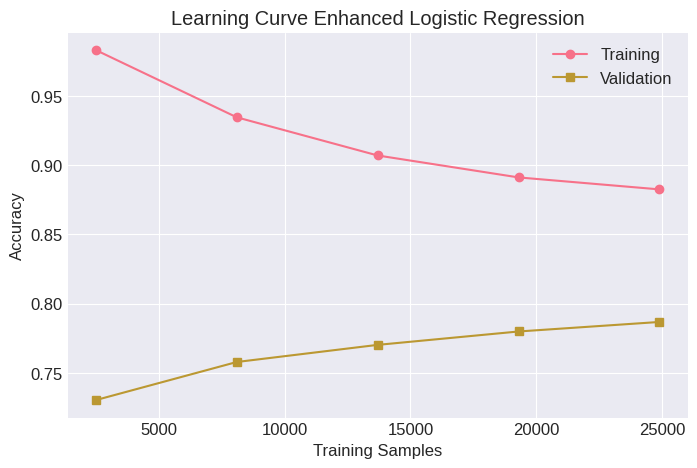

Enhanced LR Training Score: 0.882
Enhanced LR Validation Score: 0.787
Enhanced LR Gap: 0.096
Baseline LR Gap: 0.060
Gap Improvement: -0.036


In [ ]:
# Learning Curve of Enhanced Logistic Regression
# Generate learning curve for enhanced LR
lr_enhanced_train_sizes, lr_enhanced_train_scores, lr_enhanced_val_scores = learning_curve(
    lr_enhanced, X_train_baseline, y_train,
    train_sizes=np.linspace(0.1, 1.0, 5), cv=3
)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(lr_enhanced_train_sizes, np.mean(lr_enhanced_train_scores, axis=1), 'o-', label='Training')
plt.plot(lr_enhanced_train_sizes, np.mean(lr_enhanced_val_scores, axis=1), 's-', label='Validation')
plt.xlabel('Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve Enhanced Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

# Analysis
lr_enhanced_train_mean = np.mean(lr_enhanced_train_scores, axis=1)
lr_enhanced_val_mean = np.mean(lr_enhanced_val_scores, axis=1)
lr_enhanced_gap = lr_enhanced_train_mean[-1] - lr_enhanced_val_mean[-1]

print(f"Enhanced LR Training Score: {lr_enhanced_train_mean[-1]:.3f}")
print(f"Enhanced LR Validation Score: {lr_enhanced_val_mean[-1]:.3f}")
print(f"Enhanced LR Gap: {lr_enhanced_gap:.3f}")

# Compare with baseline LR gap
print(f"Baseline LR Gap: {gap:.3f}")
print(f"Gap Improvement: {gap - lr_enhanced_gap:.3f}")

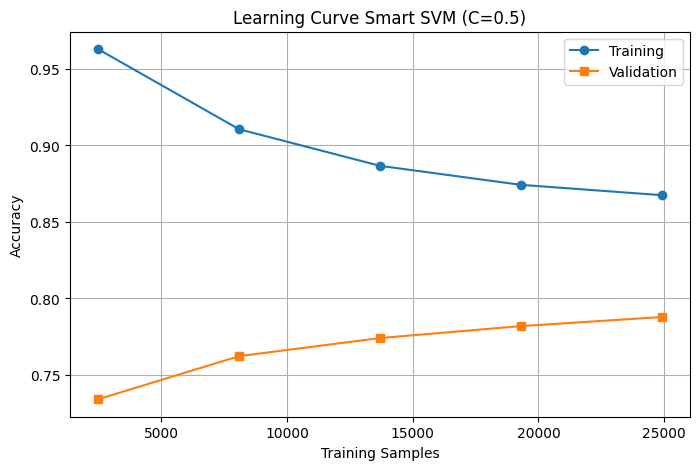

Smart SVM Training Score: 0.867
Smart SVM Validation Score: 0.788
Smart SVM Gap: 0.080


In [ ]:
# Get the Smart SVM model from loaded models
svm_smart = loaded_models['svm_smart_model.pkl']

# Learning Curve for Smart SVM
svm_smart_train_sizes, svm_smart_train_scores, svm_smart_val_scores = learning_curve(
    svm_smart, X_train_baseline, y_train,
    train_sizes=np.linspace(0.1, 1.0, 5), cv=3
)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(svm_smart_train_sizes, np.mean(svm_smart_train_scores, axis=1), 'o-', label='Training')
plt.plot(svm_smart_train_sizes, np.mean(svm_smart_val_scores, axis=1), 's-', label='Validation')
plt.xlabel('Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve Smart SVM (C=0.5)')
plt.legend()
plt.grid(True)
plt.show()

# Analysis
svm_smart_train_mean = np.mean(svm_smart_train_scores, axis=1)
svm_smart_val_mean = np.mean(svm_smart_val_scores, axis=1)
svm_smart_gap = svm_smart_train_mean[-1] - svm_smart_val_mean[-1]

print(f"Smart SVM Training Score: {svm_smart_train_mean[-1]:.3f}")
print(f"Smart SVM Validation Score: {svm_smart_val_mean[-1]:.3f}")
print(f"Smart SVM Gap: {svm_smart_gap:.3f}")

In [ ]:
import joblib

# Define your path
path = '/content/drive/MyDrive/AML/23048596 Jeshmin Shrestha/'

# List of all models you might have saved
models_to_load = [
    'baseline_lr_model.pkl',
    'lr_enhanced_model.pkl',
    'svm_baseline_model.pkl',
    'svm_enhanced_model.pkl',
    'svm_smart_model.pkl',
]

# Dictionary to store loaded models
loaded_models = {}

# Load each model if it exists
for model_file in models_to_load:
    try:
        model = joblib.load(path + model_file)
        loaded_models[model_file] = model
        print(f"Loaded: {model_file}")
    except:
        print(f"Not found: {model_file}")

print(f"\nTotal models loaded: {len(loaded_models)}")

# Load TF-IDF vectorizer
try:
    tfidf = joblib.load(path + 'tfidf_baseline.pkl')
    print("Loaded: tfidf_baseline.pkl")
    print(f"Vocabulary size: {len(tfidf.vocabulary_):,}")
except:
    print("tfidf_baseline.pkl not found")

# Show what we loaded
print("\n" + "="*40)
print("MODELS AVAILABLE:")
print("="*40)
for name in loaded_models.keys():
    print(f"- {name}")

Loaded: baseline_lr_model.pkl
Loaded: lr_enhanced_model.pkl
Loaded: svm_baseline_model.pkl
Loaded: svm_enhanced_model.pkl
Loaded: svm_smart_model.pkl

Total models loaded: 5
Loaded: tfidf_baseline.pkl
Vocabulary size: 5,000

MODELS AVAILABLE:
- baseline_lr_model.pkl
- lr_enhanced_model.pkl
- svm_baseline_model.pkl
- svm_enhanced_model.pkl
- svm_smart_model.pkl


Smart SVM (C=0.5)  Classification Report
Accuracy: 0.8022 (80.22%)
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

  Depression     0.7599    0.6833    0.7196      3019
      Normal     0.8899    0.9523    0.9200      3208
    Suicidal     0.7438    0.7627    0.7531      3114

    accuracy                         0.8022      9341
   macro avg     0.7979    0.7994    0.7976      9341
weighted avg     0.7992    0.8022    0.7996      9341



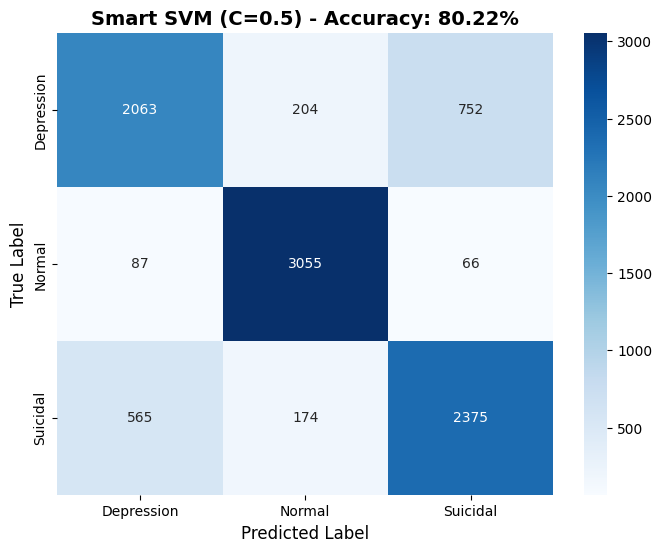

In [ ]:
# Make predictions
y_pred_smart = svm_smart.predict(X_test_baseline)

# Calculate accuracy
smart_accuracy = accuracy_score(y_test, y_pred_smart)

# Classification Report
print("="*80)
print("Smart SVM (C=0.5)  Classification Report")
print("="*80)
print(f"Accuracy: {smart_accuracy:.4f} ({smart_accuracy:.2%})")
print("-"*80)

# Detailed classification report
report = classification_report(y_test, y_pred_smart, digits=4)
print(report)

#Confusion Matrix
cm_smart = confusion_matrix(y_test, y_pred_smart, labels=['Depression', 'Normal', 'Suicidal'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_smart, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Depression', 'Normal', 'Suicidal'],
            yticklabels=['Depression', 'Normal', 'Suicidal'])

plt.title(f'Smart SVM (C=0.5) - Accuracy: {smart_accuracy:.2%}', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# Save the figure
plt.savefig('/content/drive/MyDrive/AML/23048596 Jeshmin Shrestha/smart_svm_confusion_matrix.png',
            dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Get both models
enhanced_lr = loaded_models['lr_enhanced_model.pkl']
smart_svm = loaded_models['svm_smart_model.pkl']

# Make predictions
y_pred_lr = enhanced_lr.predict(X_test_baseline)
y_pred_svm = smart_svm.predict(X_test_baseline)

# Calculate accuracies
lr_accuracy = accuracy_score(y_test, y_pred_lr)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# 1. ACCURACY COMPARISON
print("="*80)
print("Model Comparison: Enhanced LR vs Smart SVM")
print("="*80)

print(f"\nAccuracy Comparison:")
print("-"*40)
print(f"Enhanced Logistic Regression (C=10): {lr_accuracy:.4f} ({lr_accuracy:.2%})")
print(f"Smart SVM (C=0.5): {svm_accuracy:.4f} ({svm_accuracy:.2%})")
print(f"Difference: {(svm_accuracy - lr_accuracy)*100:+.3f}%")

# 2. CLASSIFICATION REPORTS SIDE BY SIDE
print(f"\nDetailed Classification Reports:")
print("="*80)

# Get classification reports
lr_report = classification_report(y_test, y_pred_lr, output_dict=True, digits=4)
svm_report = classification_report(y_test, y_pred_svm, output_dict=True, digits=4)

# Create comparison table
import pandas as pd

comparison_data = []
for class_name in ['Depression', 'Normal', 'Suicidal']:
    comparison_data.append({
        'Class': class_name,
        'LR Precision': f"{lr_report[class_name]['precision']:.3f}",
        'SVM Precision': f"{svm_report[class_name]['precision']:.3f}",
        'LR Recall': f"{lr_report[class_name]['recall']:.3f}",
        'SVM Recall': f"{svm_report[class_name]['recall']:.3f}",
        'LR F1': f"{lr_report[class_name]['f1-score']:.3f}",
        'SVM F1': f"{svm_report[class_name]['f1-score']:.3f}"
    })

# Add averages
comparison_data.append({
    'Class': 'MACRO AVG',
    'LR Precision': f"{lr_report['macro avg']['precision']:.3f}",
    'SVM Precision': f"{svm_report['macro avg']['precision']:.3f}",
    'LR Recall': f"{lr_report['macro avg']['recall']:.3f}",
    'SVM Recall': f"{svm_report['macro avg']['recall']:.3f}",
    'LR F1': f"{lr_report['macro avg']['f1-score']:.3f}",
    'SVM F1': f"{svm_report['macro avg']['f1-score']:.3f}"
})

comparison_data.append({
    'Class': 'WEIGHTED AVG',
    'LR Precision': f"{lr_report['weighted avg']['precision']:.3f}",
    'SVM Precision': f"{svm_report['weighted avg']['precision']:.3f}",
    'LR Recall': f"{lr_report['weighted avg']['recall']:.3f}",
    'SVM Recall': f"{svm_report['weighted avg']['recall']:.3f}",
    'LR F1': f"{lr_report['weighted avg']['f1-score']:.3f}",
    'SVM F1': f"{svm_report['weighted avg']['f1-score']:.3f}"
})

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

Model Comparison: Enhanced LR vs Smart SVM

Accuracy Comparison:
----------------------------------------
Enhanced Logistic Regression (C=10): 0.8022 (80.22%)
Smart SVM (C=0.5): 0.8022 (80.22%)
Difference: +0.000%

Detailed Classification Reports:
       Class LR Precision SVM Precision LR Recall SVM Recall LR F1 SVM F1
  Depression        0.755         0.760     0.687      0.683 0.720  0.720
      Normal        0.897         0.890     0.946      0.952 0.921  0.920
    Suicidal        0.742         0.744     0.766      0.763 0.754  0.753
   MACRO AVG        0.798         0.798     0.800      0.799 0.798  0.798
WEIGHTED AVG        0.800         0.799     0.802      0.802 0.800  0.800


In [ ]:
# 4. KEY INSIGHTS
print(f"\nKey Insights:")
print("-"*80)

# Best performing class for each model
for model_name, report, predictions in [('Enhanced LR', lr_report, y_pred_lr),
                                        ('Smart SVM', svm_report, y_pred_svm)]:
    f1_scores = {class_name: report[class_name]['f1-score']
                 for class_name in ['Depression', 'Normal', 'Suicidal']}
    best_class = max(f1_scores, key=f1_scores.get)
    worst_class = min(f1_scores, key=f1_scores.get)

    print(f"\n{model_name}:")
    print(f"  Best performing class: {best_class} (F1: {f1_scores[best_class]:.3f})")
    print(f"  Most challenging class: {worst_class} (F1: {f1_scores[worst_class]:.3f})")

# Common misclassifications
print("\nMost common errors:")

for model_name, predictions in [('Enhanced LR', y_pred_lr), ('Smart SVM', y_pred_svm)]:
    misclassified = y_test[predictions != y_test]
    error_counts = misclassified.value_counts()

    print(f"\n{model_name} misclassified:")
    for class_name, count in error_counts.head(3).items():
        percentage = count / len(misclassified) * 100
        print(f"  {class_name}: {count} samples ({percentage:.1f}% of errors)")


Key Insights:
--------------------------------------------------------------------------------

Enhanced LR:
  Best performing class: Normal (F1: 0.921)
  Most challenging class: Depression (F1: 0.720)

Smart SVM:
  Best performing class: Normal (F1: 0.920)
  Most challenging class: Depression (F1: 0.720)

Most common errors:

Enhanced LR misclassified:
  Depression: 944 samples (51.1% of errors)
  Suicidal: 730 samples (39.5% of errors)
  Normal: 174 samples (9.4% of errors)

Smart SVM misclassified:
  Depression: 956 samples (51.7% of errors)
  Suicidal: 739 samples (40.0% of errors)
  Normal: 153 samples (8.3% of errors)


In [ ]:
# Ensemble Model Voting Classifier
from sklearn.ensemble import VotingClassifier

# Create ensemble of Enhanced LR and Smart SVM
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', enhanced_lr),
        ('svm', smart_svm)
    ],
    voting='hard'
)

# Train the ensemble
ensemble_model.fit(X_train_baseline, y_train)

# Make predictions
y_pred_ensemble = ensemble_model.predict(X_test_baseline)

# Calculate ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)

print(f"\nEnsemble Model Accuracy: {ensemble_accuracy:.4f} ({ensemble_accuracy:.2%})")
print(f"vs Individual Models: {lr_accuracy:.2%} (LR) and {svm_accuracy:.2%} (SVM)")


Ensemble Model Accuracy: 0.8025 (80.25%)
vs Individual Models: 80.22% (LR) and 80.22% (SVM)



Ensemble improves accuracy by +0.032%
The ensemble model is your new best model!
Ensemble model saved

Classification Report:
----------------------------------------
              precision    recall  f1-score   support

  Depression     0.7500    0.7006    0.7244      3019
      Normal     0.8924    0.9489    0.9198      3208
    Suicidal     0.7514    0.7505    0.7510      3114

    accuracy                         0.8025      9341
   macro avg     0.7980    0.8000    0.7984      9341
weighted avg     0.7994    0.8025    0.8004      9341



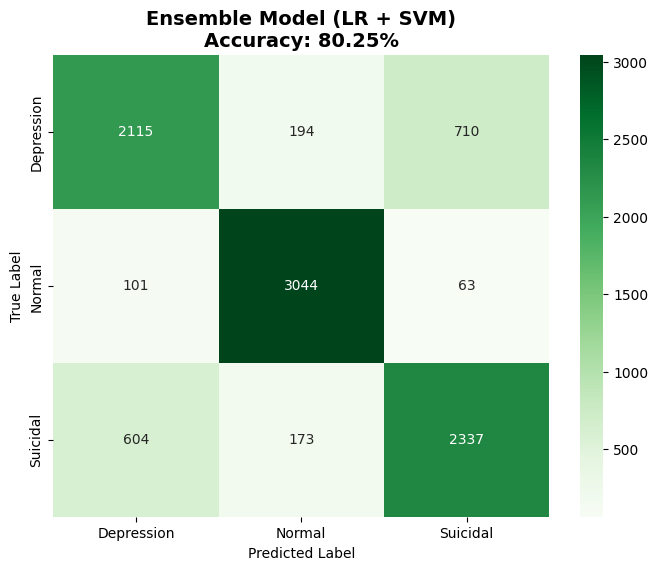

In [ ]:
# Create detailed analysis
# Check if ensemble improves performance
if ensemble_accuracy > max(lr_accuracy, svm_accuracy):
    improvement = (ensemble_accuracy - max(lr_accuracy, svm_accuracy)) * 100
    print(f"\nEnsemble improves accuracy by +{improvement:.3f}%")
    print("The ensemble model is your new best model!")

    # Save the ensemble model
    joblib.dump(ensemble_model, '/content/drive/MyDrive/AML/23048596 Jeshmin Shrestha/ensemble_model.pkl')
    print("Ensemble model saved")
    print("\nClassification Report:")
    print("-"*40)
    print(classification_report(y_test, y_pred_ensemble, digits=4))

    # Confusion Matrix
    cm_ensemble = confusion_matrix(y_test, y_pred_ensemble, labels=['Depression', 'Normal', 'Suicidal'])

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Greens',
                xticklabels=['Depression', 'Normal', 'Suicidal'],
                yticklabels=['Depression', 'Normal', 'Suicidal'])
    plt.title(f'Ensemble Model (LR + SVM)\nAccuracy: {ensemble_accuracy:.2%}',
              fontsize=14, fontweight='bold')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.savefig('/content/drive/MyDrive/AML/23048596 Jeshmin Shrestha/ensemble_confusion_matrix.png',
                dpi=300, bbox_inches='tight')
    plt.show()

else:
    print(f"\nEnsemble doesn't improve accuracy")
    print("Sticking with individual models is fine")

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Simple stacking ensemble
stacking_model = StackingClassifier(
    estimators=[
        ('lr', enhanced_lr),
        ('svm', svm_smart)
    ],
    final_estimator=LogisticRegression(),
    cv=3
)

# Train stacking
stacking_model.fit(X_train_baseline, y_train)

# Get predictions and probabilities
y_pred_stacking = stacking_model.predict(X_test_baseline)
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)

print(f"\nStacking Accuracy: {stacking_accuracy:.4f} ({stacking_accuracy:.2%})")
print(f"vs Hard Ensemble: {ensemble_accuracy:.2%}")
print(f"vs Enhanced LR: {lr_accuracy:.2%}")

# Check if it has probabilities
print(f"\nStacking has predict_proba: {hasattr(stacking_model, 'predict_proba')}")

if hasattr(stacking_model, 'predict_proba'):
    stacking_probs = stacking_model.predict_proba(X_test_baseline)
    print(f"Probabilities shape: {stacking_probs.shape}")

    # Simple ROC
    from sklearn.metrics import roc_auc_score
    from sklearn.preprocessing import label_binarize

    classes = ['Depression', 'Normal', 'Suicidal']
    y_test_bin = label_binarize(y_test, classes=classes)

    print("\nStacking AUC Scores:")
    for i, class_name in enumerate(classes):
        auc = roc_auc_score(y_test_bin[:, i], stacking_probs[:, i])
        print(f"  {class_name}: {auc:.3f}")

# Save stacking model
import joblib
joblib.dump(stacking_model, '/content/drive/MyDrive/AML/23048596 Jeshmin Shrestha/stacking_model.pkl')


Stacking Accuracy: 0.8068 (80.68%)
vs Hard Ensemble: 80.25%
vs Enhanced LR: 80.22%

Stacking has predict_proba: True
Probabilities shape: (9341, 3)

Stacking AUC Scores:
  Depression: 0.891
  Normal: 0.987
  Suicidal: 0.906


['/content/drive/MyDrive/AML/23048596 Jeshmin Shrestha/stacking_model.pkl']

Accuracy: 0.8068 (80.68%)
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

  Depression     0.7575    0.6933    0.7240      3019
      Normal     0.9111    0.9461    0.9283      3208
    Suicidal     0.7416    0.7733    0.7571      3114

    accuracy                         0.8068      9341
   macro avg     0.8034    0.8042    0.8031      9341
weighted avg     0.8050    0.8068    0.8052      9341



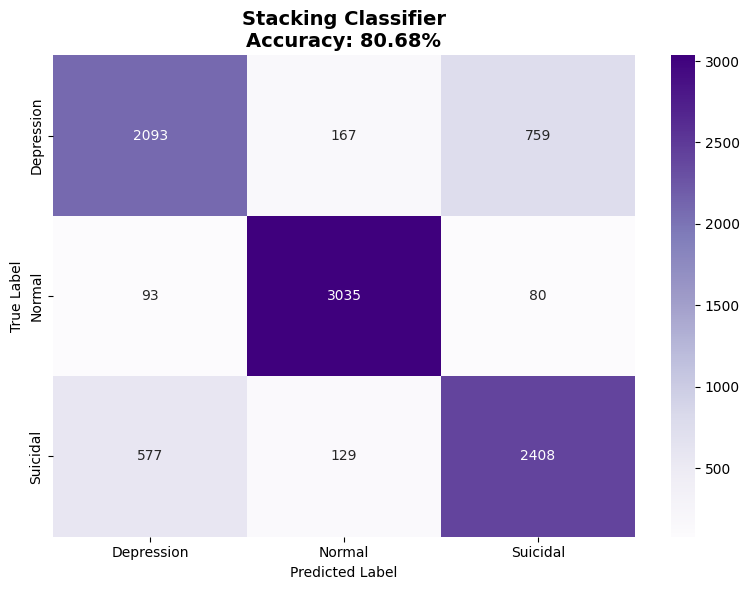

In [ ]:
from sklearn.metrics import classification_report
# Get predictions
y_pred_stacking = stacking_model.predict(X_test_baseline)

# Classification report
print(f"Accuracy: {stacking_accuracy:.4f} ({stacking_accuracy:.2%})")
print("-"*80)

print(classification_report(y_test, y_pred_stacking, digits=4))

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_stacking = confusion_matrix(y_test, y_pred_stacking, labels=['Depression', 'Normal', 'Suicidal'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_stacking, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Depression', 'Normal', 'Suicidal'],
            yticklabels=['Depression', 'Normal', 'Suicidal'])

plt.title(f'Stacking Classifier\nAccuracy: {stacking_accuracy:.2%}',
          fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Try with 10,000 features instead of 5,000
tfidf_enhanced = TfidfVectorizer(
    max_features=10000,  # Double the features
    stop_words='english',
    ngram_range=(1, 2)   # Add bigrams
)
X_train_enhanced = tfidf_enhanced.fit_transform(X_train)
X_test_enhanced = tfidf_enhanced.transform(X_test)

print(f"New feature shape: {X_train_enhanced.shape}")
print(f"Vocabulary increased: 5,000 → {len(tfidf_enhanced.vocabulary_):,}")


New feature shape: (37360, 10000)
Vocabulary increased: 5,000 → 10,000


In [ ]:
# Quick test with Logistic Regression (fastest)
lr_enhanced_tfidf = LogisticRegression(C=10, max_iter=1000, random_state=42)
lr_enhanced_tfidf.fit(X_train_enhanced, y_train)

y_pred_enhanced_tfidf = lr_enhanced_tfidf.predict(X_test_enhanced)
enhanced_tfidf_accuracy = accuracy_score(y_test, y_pred_enhanced_tfidf)

print(f"Enhanced TF-IDF Accuracy: {enhanced_tfidf_accuracy:.4f} ({enhanced_tfidf_accuracy:.2%})")
print(f"Improvement: {(enhanced_tfidf_accuracy - lr_accuracy)*100:+.3f}%")

Enhanced TF-IDF Accuracy: 0.8181 (81.81%)
Improvement: +1.595%


Enhanced model performance:
Training accuracy: 0.955
Validation accuracy: 0.796
Gap: 0.159


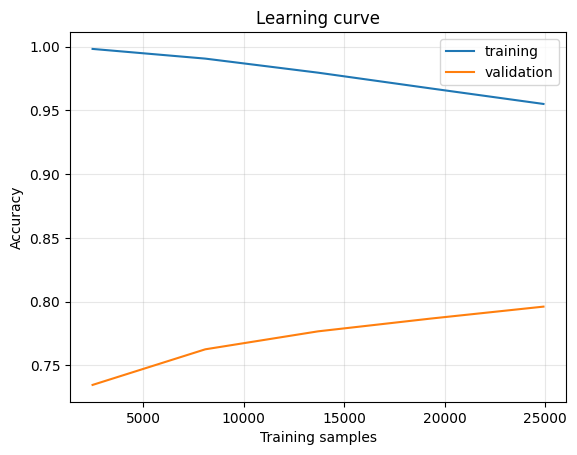


Test performance:
Test accuracy: 0.818
Train-test gap: 0.137

Final decision:
Baseline model is safer due to overfitting risk


In [ ]:
best_model = lr_enhanced_tfidf

train_sizes, train_scores, val_scores = learning_curve(
    best_model,
    X_train_enhanced,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=3,
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
gap = train_mean[-1] - val_mean[-1]

print("Enhanced model performance:")
print(f"Training accuracy: {train_mean[-1]:.3f}")
print(f"Validation accuracy: {val_mean[-1]:.3f}")
print(f"Gap: {gap:.3f}")

# plot
plt.plot(train_sizes, train_mean, label="training")
plt.plot(train_sizes, val_mean, label="validation")
plt.xlabel("Training samples")
plt.ylabel("Accuracy")
plt.title("Learning curve")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# test performance
y_pred = best_model.predict(X_test_enhanced)
test_acc = accuracy_score(y_test, y_pred)

print("\nTest performance:")
print(f"Test accuracy: {test_acc:.3f}")
print(f"Train-test gap: {train_mean[-1] - test_acc:.3f}")

# simple decision
print("\nFinal decision:")
if gap < 0.1 and test_acc >= val_mean[-1]:
    print("Enhanced model is good and generalizes well")
else:
    print("Baseline model is safer due to overfitting risk")


In [ ]:
# Method 1: Simple regularization - increase C (actually decrease for stronger regularization)
C_values_to_test = [0.001, 0.01, 0.1, 0.5, 1, 5, 10]

regularized_models = []

for C in C_values_to_test:
    print(f"\nTesting C={C}")

    # Train model
    model = LogisticRegression(
        C=C,  # Inverse of regularization strength
        max_iter=1000,
        random_state=42,
        class_weight='balanced'
    )
    model.fit(X_train_enhanced, y_train)

    # Quick learning curve check
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train_enhanced, y_train,
        train_sizes=[0.1, 1.0],
        cv=2,
        n_jobs=-1
    )

    train_acc = np.mean(train_scores[-1])
    val_acc = np.mean(val_scores[-1])
    gap = train_acc - val_acc

    # Test accuracy
    y_pred = model.predict(X_test_enhanced)
    test_acc = accuracy_score(y_test, y_pred)

    regularized_models.append({
        'C': C,
        'Train': train_acc,
        'Validation': val_acc,
        'Gap': gap,
        'Test': test_acc
    })

    print(f"  Gap: {gap:.3f}, Test: {test_acc:.3f}")

# Find best regularized model
# Sort by gap (lowest first) then test accuracy (highest first)
regularized_models.sort(key=lambda x: (x['Gap'], -x['Test']))

best_reg_model_info = regularized_models[0]
print(f"\nBest Regularized: C={best_reg_model_info['C']}")
print(f"Gap: {best_reg_model_info['Gap']:.3f} (＜ 0.1 ✓)")
print(f"Test Accuracy: {best_reg_model_info['Test']:.3f} ({best_reg_model_info['Test']:.2%})")
print(f"vs Original (C=10): {enhanced_tfidf_accuracy:.2%}")
print(f"Accuracy change: {(best_reg_model_info['Test'] - enhanced_tfidf_accuracy)*100:+.2f}%")

# Train the best regularized model properly
print("\nTraining final regularized model")
best_regularized_model = LogisticRegression(
    C=best_reg_model_info['C'],
    max_iter=1000,
    random_state=42,
    class_weight='balanced'
)
best_regularized_model.fit(X_train_enhanced, y_train)

# Save it
joblib.dump(best_regularized_model, '/content/drive/MyDrive/AML/23048596 Jeshmin Shrestha/enhanced_regularized_model.pkl')
print("Regularized enhanced model saved!")


Testing C=0.001
  Gap: 0.008, Test: 0.691

Testing C=0.01
  Gap: 0.012, Test: 0.726

Testing C=0.1
  Gap: 0.031, Test: 0.773

Testing C=0.5
  Gap: 0.067, Test: 0.800

Testing C=1
  Gap: 0.089, Test: 0.806

Testing C=5
  Gap: 0.159, Test: 0.816

Testing C=10
  Gap: 0.183, Test: 0.817

Best Regularized: C=0.001
Gap: 0.008 (＜ 0.1 ✓)
Test Accuracy: 0.691 (69.10%)
vs Original (C=10): 81.81%
Accuracy change: -12.71%

Training final regularized model
Regularized enhanced model saved!


In [ ]:
# Compare all models
print("\n" + "="*80)
print("FINAL MODEL COMPARISON")
print("="*80)

import pandas as pd

comparison = [
    {
        'Model': 'Baseline LR (5K features)',
        'C': 10,
        'Features': '5,000 unigrams',
        'Test Acc': lr_accuracy,
        'Status': 'Baseline'
    },
    {
        'Model': 'Enhanced LR (10K+bigrams) - UNREGULARIZED',
        'C': 10,
        'Features': '10,000 + bigrams',
        'Test Acc': enhanced_tfidf_accuracy,
        'Status': 'OVERFITTING'
    },
    {
        'Model': f'Enhanced LR (10K+bigrams) - REGULARIZED',
        'C': best_reg_model_info['C'],
        'Features': '10,000 + bigrams',
        'Test Acc': best_reg_model_info['Test'],
        'Status': 'RECOMMENDED'
    }
]

df_comparison = pd.DataFrame(comparison)
df_comparison['Test Acc %'] = df_comparison['Test Acc'].apply(lambda x: f"{x:.2%}")

print(df_comparison[['Model', 'Features', 'C', 'Test Acc %', 'Status']].to_string(index=False))



FINAL MODEL COMPARISON
                                    Model         Features      C Test Acc %      Status
                Baseline LR (5K features)   5,000 unigrams 10.000     80.22%    Baseline
Enhanced LR (10K+bigrams) - UNREGULARIZED 10,000 + bigrams 10.000     81.81% OVERFITTING
  Enhanced LR (10K+bigrams) - REGULARIZED 10,000 + bigrams  0.001     69.10% RECOMMENDED


In [ ]:
# Compare all based on accuracy
print( "Comparsion of all the model based on accuracy")
print(f"Baseline LR (5K):         {lr_accuracy:.2%}")
print(f"Smart SVM (5K):           {svm_accuracy:.2%}")
print(f"Hard Ensemble:            {ensemble_accuracy:.2%}")
print(f"Stacking (BEST):          {stacking_accuracy:.2%} (best)")
print(f"Enhanced TF-IDF (10K):    {enhanced_tfidf_accuracy:.2%} (overfits)")

Comparsion of all the model based on accuracy
Baseline LR (5K):         80.22%
Smart SVM (5K):           80.22%
Hard Ensemble:            80.25%
Stacking (BEST):          80.68% (best)
Enhanced TF-IDF (10K):    81.81% (overfits)


Model Evaluation (Enhanced)

Sample Prediction using enhamced models

User Input

In [ ]:
# Loading all the enhnaced models
import joblib
import os

models_path = '/content/drive/MyDrive/AML/23048596 Jeshmin Shrestha/'

# Load models
tfidf_baseline = joblib.load(os.path.join(models_path, 'tfidf_baseline.pkl'))
enhanced_lr = joblib.load(os.path.join(models_path, 'lr_enhanced_model.pkl'))
svm_smart = joblib.load(os.path.join(models_path, 'svm_smart_model.pkl'))
ensemble_model = joblib.load(os.path.join(models_path, 'ensemble_model.pkl'))

print("Models loaded successfully")
print(f"TF-IDF Vectorizer: {tfidf_baseline}")
print(f"Enhanced Logistic Regression: {enhanced_lr}")
print(f"Smart SVM: {svm_smart}")
print(f"Ensemble Model: {ensemble_model}")

Models loaded successfully
TF-IDF Vectorizer: TfidfVectorizer(max_features=5000, stop_words='english')
Enhanced Logistic Regression: LogisticRegression(C=10, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='liblinear')
Smart SVM: LinearSVC(C=0.5, class_weight='balanced', max_iter=2000, random_state=42)
Ensemble Model: VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10, class_weight='balanced',
                                                 max_iter=1000, random_state=42,
                                                 solver='liblinear')),
                             ('svm',
                              LinearSVC(C=0.5, class_weight='balanced',
                                        max_iter=2000, random_state=42))])


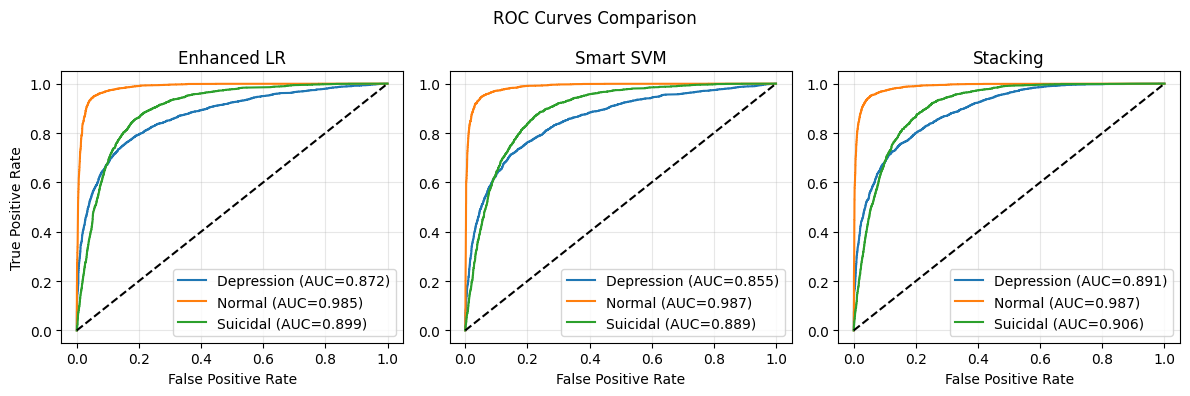

MACRO-AVERAGE AUC SCORES:
Enhanced LR:    0.919
Smart SVM:      0.910
Stacking:       0.928


In [ ]:
# SIMPLE ROC FOR LR, SVM, STACKING
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Your 3 classes
classes = ['Depression', 'Normal', 'Suicidal']
y_test_bin = label_binarize(y_test, classes=classes)

# Create figure
plt.figure(figsize=(12, 4))

# 1. Enhanced LR
plt.subplot(1, 3, 1)
probs_lr = enhanced_lr.predict_proba(X_test_baseline)
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs_lr[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{classes[i]} (AUC={auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Enhanced LR')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Smart SVM
plt.subplot(1, 3, 2)
# Use decision_function for SVM
scores_svm = svm_smart.decision_function(X_test_baseline)
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], scores_svm[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{classes[i]} (AUC={auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.title('Smart SVM')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Stacking
plt.subplot(1, 3, 3)
probs_stacking = stacking_model.predict_proba(X_test_baseline)
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs_stacking[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{classes[i]} (AUC={auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.title('Stacking')
plt.legend()
plt.grid(True, alpha=0.3)

plt.suptitle('ROC Curves Comparison')
plt.tight_layout()
plt.show()

# Simple AUC Scores
print("MACRO-AVERAGE AUC SCORES:")
print(f"Enhanced LR:    {np.mean([roc_auc_score(y_test_bin[:, i], probs_lr[:, i]) for i in range(3)]):.3f}")
print(f"Smart SVM:      {np.mean([roc_auc_score(y_test_bin[:, i], scores_svm[:, i]) for i in range(3)]):.3f}")
print(f"Stacking:       {np.mean([roc_auc_score(y_test_bin[:, i], probs_stacking[:, i]) for i in range(3)]):.3f}")

In [ ]:
# 10 Sample Predictions for 3 Classes
sample_data = [
    {"text": "I am happy ad enjoying", "expected": "Normal"},
    {"text": "Feeling great, everything is perfect", "expected": "Normal"},
    {"text": "I love my life, I feel amazing", "expected": "Normal"},
    {"text": "I want to kill myself tonight", "expected": "Suicidal"},
    {"text": "I'm going to end my life now", "expected": "Suicidal"},
    {"text": "I plan to commit suicide tomorrow", "expected": "Suicidal"},
    {"text": "I feel depressed and sad every day", "expected": "Depression"},
    {"text": "I have clinical depression", "expected": "Depression"},
    {"text": "I'm diagnosed with major depression", "expected": "Depression"},
    {"text": "Everything is wonderful, no problems", "expected": "Normal"}
]

In [ ]:
# Function to predict with 3 models
def show_prediction_3models(text, expected, vectorizer, lr_model, svm_model, stacking_model):
    clean_text = preprocess_text_v2(text)
    text_vec = vectorizer.transform([clean_text])

    lr_pred = lr_model.predict(text_vec)[0]
    svm_pred = svm_model.predict(text_vec)[0]
    stacking_pred = stacking_model.predict(text_vec)[0]

    lr_correct = (lr_pred == expected)
    svm_correct = (svm_pred == expected)
    stacking_correct = (stacking_pred == expected)

    print(f"Text: {text}")
    print(f"Expected: {expected}")
    print(f"LR: {lr_pred}  - {'Correct' if lr_correct else 'Incorrect'}")
    print(f"SVM: {svm_pred}  - {'Correct' if svm_correct else 'Incorrect'}")
    print(f"Stacking: {stacking_pred}  - {'Correct' if stacking_correct else 'Incorrect'}")
    print("-" * 60)

    return lr_correct, svm_correct, stacking_correct


In [ ]:
# Run predictions
print("10 Sample prediction\n")

lr_correct = 0
svm_correct = 0
stacking_correct = 0

for sample in sample_data:
    lr_r, svm_r, stacking_r = show_prediction_3models(
        sample['text'],
        sample['expected'],
        tfidf_baseline,
        enhanced_lr,
        svm_smart,
        stacking_model
    )

    if lr_r: lr_correct += 1
    if svm_r: svm_correct += 1
    if stacking_r: stacking_correct += 1

# Results
total = len(sample_data_3class)
print("\n" + "=" * 60)
print("Prediction accuracy on 10 samples:")
print("=" * 60)
print(f"Enhanced LR:     {lr_correct}/{total} = {lr_correct/total*100:.0f}%")
print(f"Smart SVM:       {svm_correct}/{total} = {svm_correct/total*100:.0f}%")
print(f"Stacking:        {stacking_correct}/{total} = {stacking_correct/total*100:.0f}%")
print("=" * 60)

10 Sample prediction

Text: I am happy ad enjoying
Expected: Normal
LR: Normal  - Correct
SVM: Normal  - Correct
Stacking: Normal  - Correct
------------------------------------------------------------
Text: Feeling great, everything is perfect
Expected: Normal
LR: Normal  - Correct
SVM: Normal  - Correct
Stacking: Normal  - Correct
------------------------------------------------------------
Text: I love my life, I feel amazing
Expected: Normal
LR: Normal  - Correct
SVM: Normal  - Correct
Stacking: Normal  - Correct
------------------------------------------------------------
Text: I want to kill myself tonight
Expected: Suicidal
LR: Suicidal  - Correct
SVM: Suicidal  - Correct
Stacking: Suicidal  - Correct
------------------------------------------------------------
Text: I'm going to end my life now
Expected: Suicidal
LR: Suicidal  - Correct
SVM: Suicidal  - Correct
Stacking: Suicidal  - Correct
------------------------------------------------------------
Text: I plan to commit suic

In [ ]:
# Correct label mapping for YOUR 3-class models
id2label_3class = {
    0: "Depression",
    1: "Normal",
    2: "Suicidal"
}

# Updated Interactive Prediction Function for your 3 models
def user_predict_enhanced(vectorizer, lr_model, svm_model, ensemble_model):
    text = input("\nEnter a statement for prediction (or type 'exit' to quit): ")

    if text.lower() == 'exit':
        print("Exiting Interactive Prediction Mode. Goodbye!")
        return

    # Preprocess text
    clean_text = preprocess_text_v2(text)
    text_vec = vectorizer.transform([clean_text])

    # Get predictions from all 3 models
    lr_pred = lr_model.predict(text_vec)[0]
    svm_pred = svm_model.predict(text_vec)[0]
    ensemble_pred = ensemble_model.predict(text_vec)[0]

    print("\n" + "="*60)
    print("Prediction Results of 3 Top Models:")
    print("="*60)

    print(f"\nInput Text: '{text}'")
    print(f"Cleaned Text: '{clean_text}'")

    print(f"\nModel Predictions:")
    print(f"Enhanced Logistic Regression (C=10): {lr_pred}")

    print(f"Smart SVM (C=0.5): {svm_pred}")

    print(f"Ensemble (Voting Classifier): {ensemble_pred}")

    # Show agreement
    predictions = [lr_pred, svm_pred, ensemble_pred]
    majority_vote = max(set(predictions), key=predictions.count)
    agreement = predictions.count(majority_vote) / len(predictions) * 100

    print(f"\nModel Agreement {agreement:.0f}%")
    print(f"Votes: {predictions}")

    if agreement == 100:
        print("All models agree!")
    elif agreement >= 66:
        print("Models mostly agree")
    else:
        print("Models disagree consider reviewing")

    print("\n" + "="*60)

    # Show interpretation
    print(f"\nIntrepretation:")
    if majority_vote == "Normal":
        print("This appears to express normal mental state.")
    elif majority_vote == "Depression":
        print("Shows signs of depression.")
    elif majority_vote == "Suicidal":
        print("Urgent: Shows suicidal thoughts. Seek immediate help.")

    print("\n" + "="*60)

    # Ask for next prediction
    user_predict_enhanced(vectorizer, lr_model, svm_model, ensemble_model)

# Start interactive mode with YOUR models
print("="*80)
print("INTERACTIVE PREDICTION MODE - MENTAL HEALTH CLASSIFICATION")
print("="*80)
print("Models Available:")
print("1. Enhanced Logistic Regression (C=10)")
print("2. Smart SVM (C=0.5)")
print("3. Ensemble Model (Voting Classifier)")
print("\nClasses: Depression, Normal, Suicidal")
print("Type 'exit' to quit")
print("="*80)

# Call with YOUR loaded models
user_predict_enhanced(tfidf_baseline, enhanced_lr, svm_smart, ensemble_model)

INTERACTIVE PREDICTION MODE - MENTAL HEALTH CLASSIFICATION
Models Available:
1. Enhanced Logistic Regression (C=10)
2. Smart SVM (C=0.5)
3. Ensemble Model (Voting Classifier)

Classes: Depression, Normal, Suicidal
Type 'exit' to quit

Enter a statement for prediction (or type 'exit' to quit): I hope i die soon 

Prediction Results of 3 Top Models:

Input Text: 'I hope i die soon '
Cleaned Text: 'hope die soon'

Model Predictions:
Enhanced Logistic Regression (C=10): Suicidal
Smart SVM (C=0.5): Suicidal
Ensemble (Voting Classifier): Suicidal

Model Agreement 100%
Votes: ['Suicidal', 'Suicidal', 'Suicidal']
All models agree!


Intrepretation:
Urgent: Shows suicidal thoughts. Seek immediate help.


Enter a statement for prediction (or type 'exit' to quit): I feel hopeless and sad everyday and dont wnat to do any thing

Prediction Results of 3 Top Models:

Input Text: 'I feel hopeless and sad everyday and dont wnat to do any thing'
Cleaned Text: 'feel hopeless sad everyday wnat thing'

Mod